In [49]:
!pip install -q -U tensorflow>=1.8.0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:",x_train.shape,"y_train shape:",y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 trainset
10000 testset
y =2 Pullover


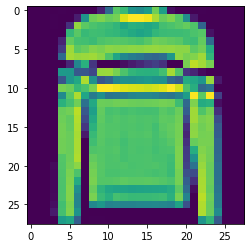

In [50]:
print("x_train shape:",x_train.shape,"y_train shape:",y_train.shape)
print(x_train.shape[0],"trainset")
print(x_test.shape[0],"testset")
fashion_mnist_labels=["T-shirt/Top","Trouser","Pullover","Dress","Coat","Sandal","shirt","Sneaker",
                       "Bag","Ankle boot"]
img_index=5;
label_index=y_train[img_index]
print("y ="+str(label_index)+" "+(fashion_mnist_labels[label_index]))
plt.imshow(x_train[img_index])

In [51]:
x_train=x_train.astype("float32")/255
x_test=x_test.astype('float32')/255

In [52]:
print("Number of train data - "  +str(len(x_train)))
print("Number of test data - "   +str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


In [53]:
(x_train,x_valid)=x_train[5000:],x_train[:5000]
(y_train,y_valid)=y_train[5000:],y_train[:5000]
w,h=28,28
x_train=x_train.reshape(x_train.shape[0],w,h,1)
x_valid=x_valid.reshape(x_valid.shape[0],w,h,1)
x_test=x_test.reshape(x_test.shape[0],w,h,1)
y_train=tf.keras.utils.to_categorical(y_train,10)
y_valid=tf.keras.utils.to_categorical(y_valid,10)
y_test=tf.keras.utils.to_categorical(y_test,10)
print("x_train shape:",x_train.shape,"y_train shape:",y_train.shape)
print(x_train.shape[0],'train set')
print(x_valid.shape[0],'validation set')
print(x_test.shape[0],'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [54]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=2,padding='same',activation="relu",input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=2,padding='same',activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)             

In [55]:
model.compile(loss='categorical_crossentropy',optimizer='adam',
               metrics=['accuracy'])

In [56]:
from keras.callbacks import ModelCheckpoint
checkpointer=ModelCheckpoint(filepath='model.weights.best.hdf5',verbose=1,save_best_only=True)
model.fit(x_train,y_train,batch_size=10,epochs=15,validation_data=(x_valid,y_valid)
              ,callbacks=[checkpointer])

    

Epoch 1/15
5500/5500 [==============================] - 460s 83ms/step - loss: 0.5263 - accuracy: 0.8085 - val_loss: 0.3128 - val_accuracy: 0.8874

Epoch 00001: val_loss improved from inf to 0.31275, saving model to model.weights.best.hdf5
Epoch 2/15
5500/5500 [==============================] - 442s 80ms/step - loss: 0.3732 - accuracy: 0.8657 - val_loss: 0.2928 - val_accuracy: 0.8926

Epoch 00002: val_loss improved from 0.31275 to 0.29281, saving model to model.weights.best.hdf5
Epoch 3/15
5500/5500 [==============================] - 403s 73ms/step - loss: 0.3323 - accuracy: 0.8795 - val_loss: 0.2600 - val_accuracy: 0.9012

Epoch 00003: val_loss improved from 0.29281 to 0.25997, saving model to model.weights.best.hdf5
Epoch 4/15
5500/5500 [==============================] - 396s 72ms/step - loss: 0.3152 - accuracy: 0.8852 - val_loss: 0.2705 - val_accuracy: 0.9040

Epoch 00004: val_loss did not improve from 0.25997
Epoch 5/15
5500/5500 [==============================] - 402s 73ms/step - 

In [57]:
model.load_weights('model.weights.best.hdf5')

In [58]:
score=model.evaluate(x_test,y_test,verbose=0)
print('\n','Test accuracy:',score[1])


 Test accuracy: 0.9154999852180481


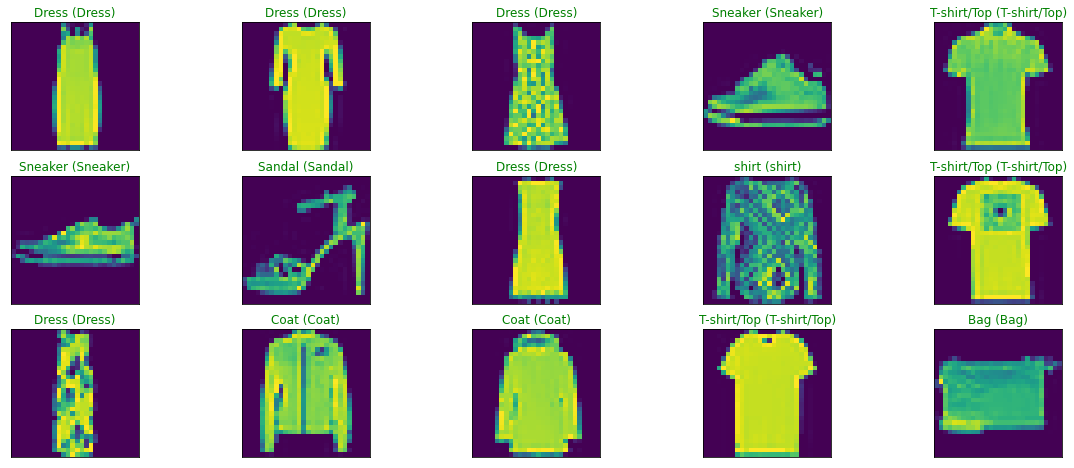

In [59]:
y_hat=model.predict(x_test)

# plot a random sample of 10 test iamges,their predict labels and ground truth
figure=plt.figure(figsize=(20,8))
for i,index in enumerate(np.random.choice(x_test.shape[0],size=15,replace=False)):
    ax=figure.add_subplot(3,5,i+1,xticks=[],yticks=[])
    #  Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index=np.argmax(y_hat[index])
    true_index=np.argmax(y_test[index])
    #  Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index],fashion_mnist_labels[true_index]),color=("green" if predict_index ==true_index else "red"))